## Testing trained neural network on PGD family id 1003711

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import pickle5 as pickle
import SureTypeSC as sc
import SureTypeSC.MachineLearning as MachineLearning
import pickle5 as pickle
from SureTypeSC.DataLoader import Patterns
from SureTypeSC import Transformations
import re

In [34]:
features=['mother_a_raw', 
          'mother_b_allele_freq', 
          'mother_x_raw', 
          'mother_y_raw',
          'father_a_raw', 
          'father_b_allele_freq', 
          'father_x_raw', 
          'father_y_raw',
          'scc_a_raw', 
          'scc_b_allele_freq', 
          'scc_x_raw', 
          'scc_y_raw']

# loading family
sample_natera_family=pd.read_pickle('1003711.pkl')

# and classifier trained on reference Coriell Family
with open('pycharm_projects/MLP.pickle','rb') as fh:
    clf=pickle.load(fh)
    

In [35]:
sample_natera_family.columns

Index([('1003711_mother', 'x_raw'), ('1003711_mother', 'y_raw'),
         ('1003711_mother', 'baf'), ('1003711_father', 'x_raw'),
       ('1003711_father', 'y_raw'),   ('1003711_father', 'baf'),
        ('1003711_child', 'x_raw'),  ('1003711_child', 'y_raw'),
          ('1003711_child', 'baf')],
      dtype='object')

In [36]:
sample_natera_family.columns=pd.MultiIndex.from_tuples([(re.search('[0-9]_(.*)', i[0]).group(1).replace('child','scc'),i[1].replace('baf','b_allele_freq')) for i in sample_natera_family.columns])

In [37]:
sample_natera_family

mother                         father           \
                        x_raw    y_raw b_allele_freq   x_raw    y_raw   
position  rsid                                                          
742429    rs3094315    8167.0    707.0      0.008028  7586.0    489.0   
743404    rs2073813    1069.0   9318.0      0.964236  1061.0   8877.0   
760079    rs2905040     558.0  11640.0      1.000000   537.0  11648.0   
766409    rs12124819   2225.0    752.0      0.065965  2766.0    665.0   
771121    rs2980314     825.0  10189.0      0.989161   703.0   7733.0   
...                       ...      ...           ...     ...      ...   
154886032 rs3093493    9568.0   1309.0      0.004295  5702.0   8860.0   
154886292 rs2037999   10466.0  12980.0      0.588306  9904.0   9305.0   
154887040 rs3093499     863.0  16592.0      0.998895   983.0  16174.0   
154887901 rs3093504   11687.0   1850.0      0.021370  9961.0   1262.0   
154889027 rs3093515    1402.0  18021.0      0.953970  1342.0  18248.0   

                                        scc                         
                     b_allele_freq    x_raw    y_raw b_allele_freq  
position  rsid                                                      
742429    rs3094315       0.000000   7493.0    775.0      0.010215  
743404    rs2073813       0.964112   1734.0   6241.0      0.878356  
760079    rs2905040       1.000000   1027.0  12580.0      0.994068  
766409    rs12124819      0.026236   3768.0    742.0      0.000000  
771121    rs2980314       0.989091    975.0   7617.0      0.979768  
...                            ...      ...      ...           ...  
154886032 rs3093493       0.617796   9934.0   1445.0      0.013444  
154886292 rs2037999       0.487946  12562.0   3193.0      0.079660  
154887040 rs3093499       0.990517   1674.0  21812.0      0.986753  
154887901 rs3093504       0.002422  17846.0   2518.0      0.024017  
154889027 rs3093515       0.960298   2145.0  31489.0      0.981432  

[292327 rows x 9 columns]

In [39]:
sample_natera_family_stacked=sample_natera_family.stack(level=0)

In [40]:
sample_natera_family_stacked['a_raw']=Transformations.A_2(sample_natera_family_stacked.x_raw,
                                                          sample_natera_family_stacked.y_raw)
sample_natera_family_stacked

b_allele_freq    x_raw    y_raw      a_raw
position  rsid                                                        
742429    rs3094315 father       0.000000   7586.0    489.0  10.911407
                    mother       0.008028   8167.0    707.0  11.230578
                    scc          0.010215   7493.0    775.0  11.234690
743404    rs2073813 father       0.964112   1061.0   8877.0  11.583533
                    mother       0.964236   1069.0   9318.0  11.623925
...                                   ...      ...      ...        ...
154887901 rs3093504 mother       0.021370  11687.0   1850.0  12.182963
                    scc          0.024017  17846.0   2518.0  12.710688
154889027 rs3093515 father       0.960298   1342.0  18248.0  12.272810
                    mother       0.953970   1402.0  18021.0  12.295331
                    scc          0.981432   2145.0  31489.0  13.004661

[876981 rows x 4 columns]

In [41]:
sample_natera_family_unstacked=sample_natera_family_stacked.unstack(level=2)
sample_natera_family_unstacked.columns=sample_natera_family_unstacked.columns.swaplevel()

In [42]:
sample_natera_family_unstacked

,,father,mother,scc,father,mother,scc,father,mother,scc,father,mother,scc
,,b_allele_freq,b_allele_freq,b_allele_freq,x_raw,x_raw,x_raw,y_raw,y_raw,y_raw,a_raw,a_raw,a_raw
position,rsid,,,,,,,,,,,,
814,rs28615667,0.560039,0.000000,0.988203,11740.0,18715.0,767.0,12187.0,681.0,2540.0,13.546100,11.801709,10.446848
11244,rs6139074,0.496370,0.000000,0.483886,4641.0,8201.0,3433.0,3874.0,727.0,2486.0,12.049914,11.253698,11.512432
16749,rs6086616,1.000000,0.530019,1.000000,1089.0,7349.0,1702.0,13156.0,11425.0,17069.0,11.886111,13.161619,12.396053
18901,rs8064924,0.532713,0.525731,0.981290,5397.0,5544.0,1067.0,7686.0,8132.0,9356.0,12.652980,12.713053,11.625510
28628,rs6082111,0.999252,1.000000,1.000000,582.0,555.0,961.0,12089.0,14081.0,18671.0,11.373141,11.448903,12.048452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247137334,rs10788875,0.484326,0.480774,0.988350,4737.0,4902.0,814.0,5837.0,6273.0,5330.0,12.360385,12.437047,11.024402
247146479,rs12043282,0.000000,0.000000,0.000000,6896.0,6080.0,8275.0,530.0,420.0,692.0,10.900696,10.642051,11.224586


In [43]:
sample_natera_family_unstacked.columns=pd.Index(['_'.join(list(c)) for c in sample_natera_family_unstacked.columns])
sample_natera_family_unstacked.dropna(inplace=True)
sample_natera_family_unstacked

,,father_b_allele_freq,mother_b_allele_freq,scc_b_allele_freq,father_x_raw,mother_x_raw,scc_x_raw,father_y_raw,mother_y_raw,scc_y_raw,father_a_raw,mother_a_raw,scc_a_raw
position,rsid,,,,,,,,,,,,
814,rs28615667,0.560039,0.000000,0.988203,11740.0,18715.0,767.0,12187.0,681.0,2540.0,13.546100,11.801709,10.446848
11244,rs6139074,0.496370,0.000000,0.483886,4641.0,8201.0,3433.0,3874.0,727.0,2486.0,12.049914,11.253698,11.512432
16749,rs6086616,1.000000,0.530019,1.000000,1089.0,7349.0,1702.0,13156.0,11425.0,17069.0,11.886111,13.161619,12.396053
18901,rs8064924,0.532713,0.525731,0.981290,5397.0,5544.0,1067.0,7686.0,8132.0,9356.0,12.652980,12.713053,11.625510
28628,rs6082111,0.999252,1.000000,1.000000,582.0,555.0,961.0,12089.0,14081.0,18671.0,11.373141,11.448903,12.048452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247137334,rs10788875,0.484326,0.480774,0.988350,4737.0,4902.0,814.0,5837.0,6273.0,5330.0,12.360385,12.437047,11.024402
247146479,rs12043282,0.000000,0.000000,0.000000,6896.0,6080.0,8275.0,530.0,420.0,692.0,10.900696,10.642051,11.224586
247153304,rs12088332,1.000000,1.000000,0.972640,636.0,526.0,759.0,9189.0,8434.0,4713.0,11.239288,11.040460,10.885193


## Classification using MLP

In [45]:
sample_natera_family_unstacked['scc_gtype']=clf.predict(sample_natera_family_unstacked[features])
sample_natera_family_unstacked[['scc_score_AA','scc_score_AB','scc_score_BB']]=clf.predict_proba(sample_natera_family_unstacked[features])
sample_natera_family_unstacked

,,father_b_allele_freq,mother_b_allele_freq,scc_b_allele_freq,father_x_raw,mother_x_raw,scc_x_raw,father_y_raw,mother_y_raw,scc_y_raw,father_a_raw,mother_a_raw,scc_a_raw,scc_gtype,scc_score_AA,scc_score_AB,scc_score_BB
position,rsid,,,,,,,,,,,,,,,,
814,rs28615667,0.560039,0.000000,0.988203,11740.0,18715.0,767.0,12187.0,681.0,2540.0,13.546100,11.801709,10.446848,AA,1.0,0.0,0.0
11244,rs6139074,0.496370,0.000000,0.483886,4641.0,8201.0,3433.0,3874.0,727.0,2486.0,12.049914,11.253698,11.512432,AA,1.0,0.0,0.0
16749,rs6086616,1.000000,0.530019,1.000000,1089.0,7349.0,1702.0,13156.0,11425.0,17069.0,11.886111,13.161619,12.396053,BB,0.0,0.0,1.0
18901,rs8064924,0.532713,0.525731,0.981290,5397.0,5544.0,1067.0,7686.0,8132.0,9356.0,12.652980,12.713053,11.625510,AB,0.0,1.0,0.0
28628,rs6082111,0.999252,1.000000,1.000000,582.0,555.0,961.0,12089.0,14081.0,18671.0,11.373141,11.448903,12.048452,BB,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247137334,rs10788875,0.484326,0.480774,0.988350,4737.0,4902.0,814.0,5837.0,6273.0,5330.0,12.360385,12.437047,11.024402,AB,0.0,1.0,0.0
247146479,rs12043282,0.000000,0.000000,0.000000,6896.0,6080.0,8275.0,530.0,420.0,692.0,10.900696,10.642051,11.224586,AA,1.0,0.0,0.0
247153304,rs12088332,1.000000,1.000000,0.972640,636.0,526.0,759.0,9189.0,8434.0,4713.0,11.239288,11.040460,10.885193,BB,0.0,0.0,1.0


<AxesSubplot:xlabel='scc_score_AA', ylabel='Density'>

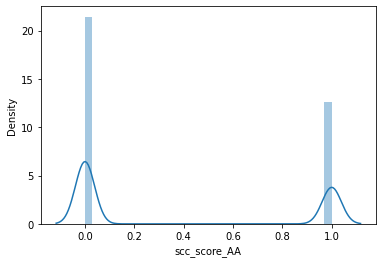

In [48]:
sns.distplot(sample_natera_family_unstacked['scc_score_AA'])

<AxesSubplot:xlabel='scc_score_BB', ylabel='Density'>

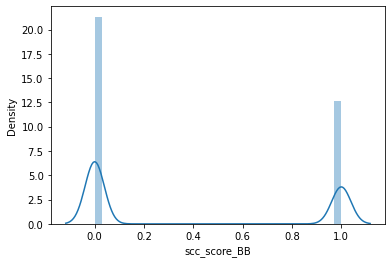

In [49]:
sns.distplot(sample_natera_family_unstacked['scc_score_BB'])

<AxesSubplot:xlabel='scc_score_AB', ylabel='Density'>

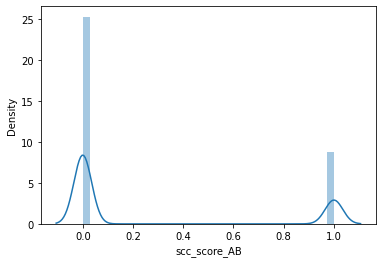

In [50]:
sns.distplot(sample_natera_family_unstacked['scc_score_AB'])

In [51]:
sample_natera_family_unstacked[['scc_score_AA','scc_score_AB','scc_score_BB']].value_counts()

scc_score_AA   scc_score_AB   scc_score_BB
0.000000e+00   0.000000e+00   1.0             107106
1.000000e+00   0.000000e+00   0.0             105825
0.000000e+00   1.000000e+00   0.0              71162
               4.940656e-324  1.0                  3
1.000000e+00   4.940656e-324  0.0                  3
                                               ...  
2.682746e-86   1.000000e+00   0.0                  1
3.828215e-86   1.000000e+00   0.0                  1
4.328069e-86   1.000000e+00   0.0                  1
6.226304e-86   1.000000e+00   0.0                  1
2.912094e-296  1.000000e+00   0.0                  1
Length: 7470, dtype: int64

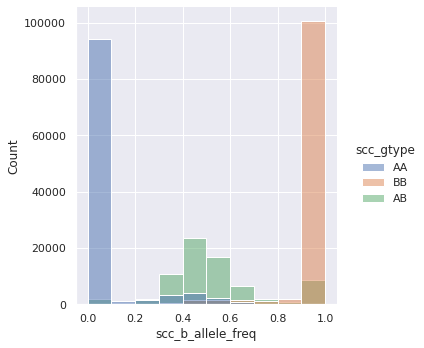

In [52]:
sns.set_theme(style="darkgrid")
sns.displot(
    sample_natera_family_unstacked[sample_natera_family_unstacked.scc_score_BB.isin([0,1])], x='scc_b_allele_freq', hue='scc_gtype',binwidth=0.1)